**Set environment**

In [5]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
library(pheatmap)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import TSS

In [2]:
fdiry = file.path(FD_RES, "results", "region", "annotation_tss_pol2")
fname = "K562.TSS.selected_by_highest_Pol2_signal.filtered_by_RNAseq_TPM.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Gene", "Score")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_region_tss = dat
head(dat)

Chrom,Start,End,Gene,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,29370,29371,WASH7P,2.30000e-04
chr1,827522,827523,LINC00115,6.44656e+01
chr1,827590,827591,LINC01128,6.44603e+01
chr1,876802,876803,FAM41C,7.88399e-03
chr1,959256,959257,NOC2L,1.04866e+02
chr1,960583,960584,KLHL17,8.22571e+00


## Import CRISPRi-HCRFF peaks

In [3]:
###
fdiry = file.path(FD_RES, "results", "region", "annotation_crispri_hcrff")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)

###
fname = "crispri_hcrff.casa.bed.gz"
fpath = file.path(fdiry, fname)

###
vec = dat$Name
dat = read_tsv(fpath, col_names = vec, show_col_types = FALSE)

###
dat_peak_crispri_hcrff = dat
print(dim(dat))
head(dat)

[1] 113  10


Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5248847,5249047,chr11:5248847-5249047,1.0686240,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5248847,5249047,chr11:5248847-5249047,0.9357701,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5249847,5250847,chr11:5249847-5250847,1.8908899,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5249847,5250847,chr11:5249847-5250847,1.9229558,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5253147,5253547,chr11:5253147-5253547,1.3303423,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5253147,5253547,chr11:5253147-5253547,1.3232571,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2


## Explore

In [4]:
dat = dat_peak_crispri_hcrff
vec = dat$Gene_Symbol

dat = dat_region_tss
dat = dat %>% dplyr::filter(Gene %in% vec)

dat

Chrom,Start,End,Gene,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5249857,5249858,HBG1,17.42930
chr11,5254781,5254782,HBG2,15.73020
chr11,5269945,5269946,HBE1,319.92500
chr11,33869878,33869879,LMO2,8.55278
chr11,34051730,34051731,CAPRIN1,203.81000
chr11,34438933,34438934,CAT,68.08190
chr11,61792910,61792911,FEN1,232.47000
chr11,61816202,61816203,FADS2,418.26700
chr11,61817003,61817004,FADS1,158.66100


In [6]:
dat = dat_peak_crispri_hcrff
dat = dat %>% dplyr::mutate(Length = End - Start)
dat = dat %>% 
    dplyr::group_by(Gene_Symbol, Length) %>% 
    dplyr::summarise(Count = n(), .groups="drop") %>%
    tidyr::spread(Gene_Symbol, Count)
head(dat) 

Length,CAPRIN1,CAT,CD164,ERP29,FADS1,FADS2,FADS3,FEN1,GATA1,⋯,HBG1,HBG2,HBS1L,HDAC6,LMO2,MEF2C,MYB,MYC,NMU,PVT1
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
200,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,NA,NA,NA,NA,NA,NA,NA,3
300,NA,NA,NA,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
400,NA,1,NA,NA,1,NA,1,NA,NA,⋯,4,3,NA,NA,NA,NA,NA,NA,NA,3
500,1,NA,NA,NA,NA,NA,NA,1,NA,⋯,NA,2,NA,NA,1,NA,1,NA,1,1
600,1,NA,1,2,NA,NA,1,NA,NA,⋯,2,1,NA,NA,NA,1,NA,NA,NA,1
700,NA,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1,NA,NA,NA,1,NA,1


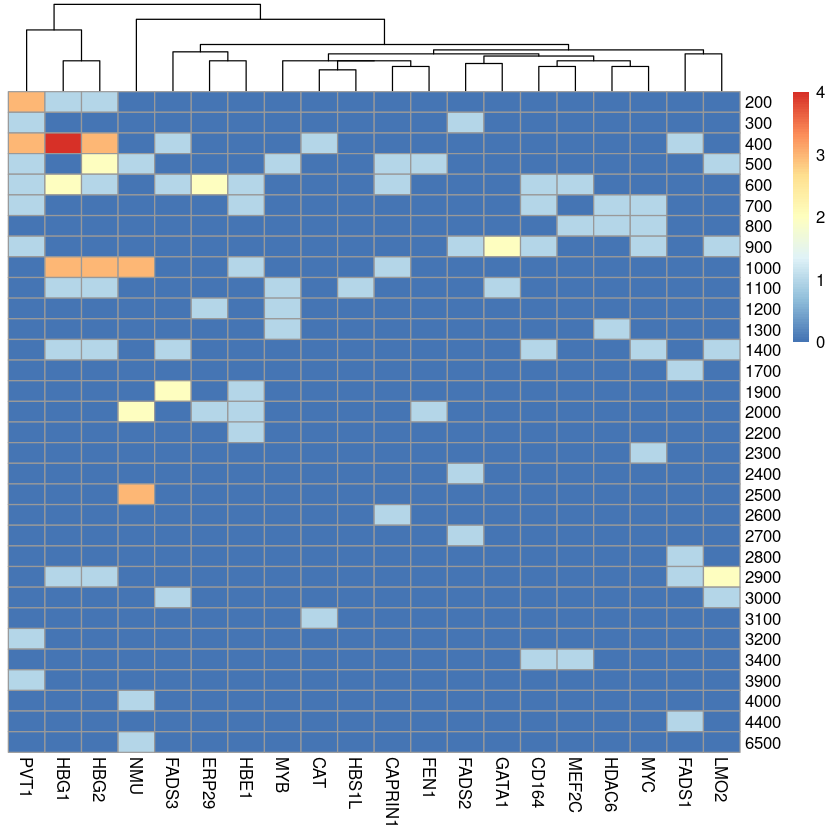

In [7]:
mat = dat
mat = mat %>% column_to_rownames("Length") %>% as.matrix %>% replace(is.na(.), 0)
pheatmap(mat, cluster_rows = FALSE)

## Create Peak-TSS pairs

In [8]:
###
dat = dat_peak_crispri_hcrff
dat = dat %>%
    dplyr::mutate(
        Name = paste(Name, Gene_Symbol, sep="|"),
        Gene = Gene_Symbol
    ) %>%
    dplyr::rename(
        "Chrom_Peak" = "Chrom", 
        "Start_Peak" = "Start", 
        "End_Peak"   = "End") %>%
    dplyr::select(Chrom_Peak, Start_Peak, End_Peak, Name, Score, Gene)

###
dat1 = dat

###
dat = dat_region_tss
dat = dat %>%
    dplyr::rename(
        "Chrom_TSS" = "Chrom", 
        "Start_TSS" = "Start", 
        "End_TSS"   = "End") %>%
    dplyr::select(Chrom_TSS, Start_TSS, End_TSS, Gene)

###
dat2 = dat

###
dat = dplyr::left_join(dat1, dat2, by="Gene")
dat = dat %>% 
    dplyr::select(
        Chrom_Peak, Start_Peak, End_Peak, 
        Chrom_TSS,  Start_TSS,  End_TSS, 
        Name, Score) %>%
    dplyr::arrange(
        Chrom_Peak, Start_Peak, End_Peak, 
        Chrom_TSS,  Start_TSS,  End_TSS)

###
dat_region_pair = dat
print(dim(dat))
head(dat)

[1] 113   8


Chrom_Peak,Start_Peak,End_Peak,Chrom_TSS,Start_TSS,End_TSS,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5248847,5249047,chr11,5249857,5249858,chr11:5248847-5249047|HBG1,1.0686240
chr11,5248847,5249047,chr11,5254781,5254782,chr11:5248847-5249047|HBG2,0.9357701
chr11,5249847,5250847,chr11,5249857,5249858,chr11:5249847-5250847|HBG1,1.8908899
chr11,5249847,5250847,chr11,5254781,5254782,chr11:5249847-5250847|HBG2,1.9229558
chr11,5253147,5253547,chr11,5249857,5249858,chr11:5253147-5253547|HBG1,1.3303423
chr11,5253147,5253547,chr11,5254781,5254782,chr11:5253147-5253547|HBG2,1.3232571


In [12]:
dat = dat_region_pair
dat = dat %>%
    dplyr::mutate(Start_Peak = (Start_Peak + End_Peak) %/% 2) %>%
    dplyr::mutate(  End_Peak = Start_Peak + 1) #%>%
    #dplyr::mutate(      Name = str_replace_all(Name, pattern = ":|-|\\|", replacement = "_"))

dat_loc_pair = dat
print(dim(dat))
head(dat)

[1] 113   8


Chrom_Peak,Start_Peak,End_Peak,Chrom_TSS,Start_TSS,End_TSS,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5248947,5248948,chr11,5249857,5249858,chr11:5248847-5249047|HBG1,1.0686240
chr11,5248947,5248948,chr11,5254781,5254782,chr11:5248847-5249047|HBG2,0.9357701
chr11,5250347,5250348,chr11,5249857,5249858,chr11:5249847-5250847|HBG1,1.8908899
chr11,5250347,5250348,chr11,5254781,5254782,chr11:5249847-5250847|HBG2,1.9229558
chr11,5253347,5253348,chr11,5249857,5249858,chr11:5253147-5253547|HBG1,1.3303423
chr11,5253347,5253348,chr11,5254781,5254782,chr11:5253147-5253547|HBG2,1.3232571


In [15]:
dat = dat_loc_pair
dat = dat %>%
    dplyr::mutate(Length = Start_Peak - Start_TSS) %>%
    dplyr::filter(abs(Length) >= 1000) %>%
    dplyr::select(-Length)
    
dat_loc_pair_filter = dat
print(dim(dat))
head(dat)

[1] 95  8


Chrom_Peak,Start_Peak,End_Peak,Chrom_TSS,Start_TSS,End_TSS,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5248947,5248948,chr11,5254781,5254782,chr11:5248847-5249047|HBG2,0.9357701
chr11,5250347,5250348,chr11,5254781,5254782,chr11:5249847-5250847|HBG2,1.9229558
chr11,5253347,5253348,chr11,5249857,5249858,chr11:5253147-5253547|HBG1,1.3303423
chr11,5253347,5253348,chr11,5254781,5254782,chr11:5253147-5253547|HBG2,1.3232571
chr11,5254147,5254148,chr11,5249857,5249858,chr11:5253647-5254647|HBG1,1.5044044
chr11,5275747,5275748,chr11,5269945,5269946,chr11:5275247-5276247|HBE1,0.9203765


## Store results

In [16]:
fdiry = file.path(FD_RES, "results", "hic_intact_K562_deep", "coverage_aggregate")
fname = "region_pair.TSS.crispri_hcrff.bedpe"
fpath = file.path(fdiry, fname)

dat = dat_region_pair
colnames(dat)[1] = paste0("#", colnames(dat)[1])

write_tsv(dat, fpath)

In [17]:
fdiry = file.path(FD_RES, "results", "hic_intact_K562_deep", "coverage_aggregate")
fname = "location_pair.TSS.crispri_hcrff.bedpe"
fpath = file.path(fdiry, fname)

dat = dat_loc_pair
colnames(dat)[1] = paste0("#", colnames(dat)[1])

write_tsv(dat, fpath)

In [21]:
fdiry = file.path(FD_RES, "results", "hic_intact_K562_deep", "coverage_aggregate")
fname = "location_pair.TSS.crispri_hcrff.filter1kb.bedpe"
fpath = file.path(fdiry, fname)

dat = dat_loc_pair_filter
colnames(dat)[1] = paste0("#", colnames(dat)[1])

write_tsv(dat, fpath)

In [19]:
dat = dat_loc_pair
lst = split(dat, dat$Chrom_Peak)

fdiry = file.path(FD_RES, "results", "hic_intact_K562_deep", "coverage_aggregate")
for (idx in names(lst)) {
    ###
    fname = paste("location_pair.TSS.crispri_hcrff", idx, "bedpe", sep=".")
    fpath = file.path(fdiry, fname)
    cat(fname, "\n")

    ###
    dat = lst[[idx]]
    colnames(dat)[1] = paste0("#", colnames(dat)[1])

    write_tsv(dat, fpath)
}

location_pair.TSS.crispri_hcrff.chr11.bedpe 
location_pair.TSS.crispri_hcrff.chr12.bedpe 
location_pair.TSS.crispri_hcrff.chr4.bedpe 
location_pair.TSS.crispri_hcrff.chr5.bedpe 
location_pair.TSS.crispri_hcrff.chr6.bedpe 
location_pair.TSS.crispri_hcrff.chr8.bedpe 
location_pair.TSS.crispri_hcrff.chrX.bedpe 


In [22]:
dat = dat_loc_pair_filter
lst = split(dat, dat$Chrom_Peak)

fdiry = file.path(FD_RES, "results", "hic_intact_K562_deep", "coverage_aggregate")
for (idx in names(lst)) {
    ###
    fname = paste("location_pair.TSS.crispri_hcrff.filter1kb", idx, "bedpe", sep=".")
    fpath = file.path(fdiry, fname)
    cat(fname, "\n")

    ###
    dat = lst[[idx]]
    colnames(dat)[1] = paste0("#", colnames(dat)[1])

    write_tsv(dat, fpath)
}

location_pair.TSS.crispri_hcrff.filter1kb.chr11.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chr12.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chr4.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chr5.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chr6.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chr8.bedpe 
location_pair.TSS.crispri_hcrff.filter1kb.chrX.bedpe 
